<a href="https://colab.research.google.com/github/hwangsaeyeon/AAI-Web-Development/blob/main/DNN_predict_WAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Load Data 



In [ ]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
!cd "/content/drive/My Drive/webdev"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/webdev/finaldata.csv',encoding='CP949')
data

,Unnamed: 0,날짜,away team,home team,"승패([0,1])",away 투수,home 투수,away team 명단,home team 명단
0,0,2015.03.28,한화 이글스,넥센 히어로즈,"[0, 1]",탈보트,밴헤켄,"['이용규', '권용관', '김경언', '김태균', '김회성', '모건', '정범모...","['서건창', '이택근', '유한준', '박병호', '김민성', '스나이더', '이..."
1,1,2015.03.28,NC 다이노스,두산 베어스,"[0, 1]",찰리,마야,"['박민우', '이종욱', '나성범', '테임즈', '모창민', '이호준', '손시...","['민병헌', '정수빈', '김현수', '루츠', '홍성흔', '오재원', '양의지..."
2,2,2015.03.28,KT 위즈,롯데 자이언츠,"[0, 1]",어윈,레일리,"['김동명', '이대형', '박경수', '마르테', '김상현', '신명철', '김사...","['아두치', '황재균', '손아섭', '최준석', '박종윤', '강민호', '김대..."
3,3,2015.03.28,SK 와이번스,삼성 라이온즈,"[0, 1]",밴와트,피가로,"['이명기', '박계현', '이재원', '박정권', '브라운', '임훈', '나주환...","['나바로', '박한이', '박석민', '최형우', '이승엽', '구자욱', '박해..."
4,4,2015.03.28,LG 트윈스,KIA 타이거즈,"[0, 1]",소사,양현종,"['오지환', '정성훈', '박용택', '최승준', '정의윤', '이병규', '채은...","['김주찬', '강한울', '필', '나지완', '최희섭', '이범호', '김원섭'..."
...,...,...,...,...,...,...,...,...,...
5449,5449,2022.07.10,NC 다이노스,키움 히어로즈,"[0, 1]",구창모,안우진,"['손아섭', '권희동', '박민우', '양의지', '마티니', '박준영', '이명...","['김준완', '김혜성', '이정후', '송성문', '푸이그', '이용규', '이주..."
5450,5450,2022.07.10,LG 트윈스,두산 베어스,"[1, 0]",켈리,이영하,"['박해민', '문성주', '김현수', '채은성', '문보경', '유강남', '이영...","['허경민', '양찬열', '페르난데', '양석환', '안재석', '박세혁', '박..."
5451,5451,2022.07.10,SSG 랜더스,삼성 라이온즈,"[1, 0]",오원석,백정현,"['추신수', '최지훈', '박성한', '최정', '전의산', '하재훈', '오태곤...","['김현준', '오선진', '피렐라', '오재일', '이원석', '강민호', '이재..."
5452,5452,2022.07.10,롯데 자이언츠,KT 위즈,"[1, 0]",박세웅,배제성,"['안치홍', '황성빈', '한동희', '전준우', '정훈', '피터스', '고승민...","['조용호', '김민혁', '알포드', '박병호', '장성우', '황재균', '배정..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5454 non-null   int64 
 1   날짜            5454 non-null   object
 2   away team     5454 non-null   object
 3   home team     5454 non-null   object
 4   승패([0,1])     5454 non-null   object
 5   away 투수       5454 non-null   object
 6   home 투수       5454 non-null   object
 7   away team 명단  5454 non-null   object
 8   home team 명단  5454 non-null   object
dtypes: int64(1), object(8)
memory usage: 383.6+ KB


##2.Preprocessing

In [ ]:
for i in range(len(data)):
  if data['승패([0,1])'][i] == '[0, 1]':
    data['승패([0,1])'][i] = 1
  elif data['승패([0,1])'][i] == '[1, 0]':
    data['승패([0,1])'][i] = 0 
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,날짜,away team,home team,"승패([0,1])",away 투수,home 투수,away team 명단,home team 명단
0,0,2015.03.28,한화 이글스,넥센 히어로즈,1,탈보트,밴헤켄,"['이용규', '권용관', '김경언', '김태균', '김회성', '모건', '정범모...","['서건창', '이택근', '유한준', '박병호', '김민성', '스나이더', '이..."
1,1,2015.03.28,NC 다이노스,두산 베어스,1,찰리,마야,"['박민우', '이종욱', '나성범', '테임즈', '모창민', '이호준', '손시...","['민병헌', '정수빈', '김현수', '루츠', '홍성흔', '오재원', '양의지..."
2,2,2015.03.28,KT 위즈,롯데 자이언츠,1,어윈,레일리,"['김동명', '이대형', '박경수', '마르테', '김상현', '신명철', '김사...","['아두치', '황재균', '손아섭', '최준석', '박종윤', '강민호', '김대..."
3,3,2015.03.28,SK 와이번스,삼성 라이온즈,1,밴와트,피가로,"['이명기', '박계현', '이재원', '박정권', '브라운', '임훈', '나주환...","['나바로', '박한이', '박석민', '최형우', '이승엽', '구자욱', '박해..."
4,4,2015.03.28,LG 트윈스,KIA 타이거즈,1,소사,양현종,"['오지환', '정성훈', '박용택', '최승준', '정의윤', '이병규', '채은...","['김주찬', '강한울', '필', '나지완', '최희섭', '이범호', '김원섭'..."
...,...,...,...,...,...,...,...,...,...
5449,5449,2022.07.10,NC 다이노스,키움 히어로즈,1,구창모,안우진,"['손아섭', '권희동', '박민우', '양의지', '마티니', '박준영', '이명...","['김준완', '김혜성', '이정후', '송성문', '푸이그', '이용규', '이주..."
5450,5450,2022.07.10,LG 트윈스,두산 베어스,0,켈리,이영하,"['박해민', '문성주', '김현수', '채은성', '문보경', '유강남', '이영...","['허경민', '양찬열', '페르난데', '양석환', '안재석', '박세혁', '박..."
5451,5451,2022.07.10,SSG 랜더스,삼성 라이온즈,0,오원석,백정현,"['추신수', '최지훈', '박성한', '최정', '전의산', '하재훈', '오태곤...","['김현준', '오선진', '피렐라', '오재일', '이원석', '강민호', '이재..."
5452,5452,2022.07.10,롯데 자이언츠,KT 위즈,0,박세웅,배제성,"['안치홍', '황성빈', '한동희', '전준우', '정훈', '피터스', '고승민...","['조용호', '김민혁', '알포드', '박병호', '장성우', '황재균', '배정..."


##3. Hitter

In [ ]:
import numpy as np

In [ ]:
hitter = pd.read_csv('/content/drive/MyDrive/webdev/Player_Crawling_Hitter.csv',encoding='CP949')
hitter = hitter.replace('-',float(0))
hitter = hitter.astype({'년도':'int'})
hitter = hitter.astype({'WAR':'float'})
hitter = hitter.astype({'타율':'float'})
hitter = hitter.astype({'장타율':'float'})
hitter = hitter.astype({'팀명':'string'})
hitter = hitter.astype({'선수명':'string'})
hitter['출루율'] = pd.to_numeric(hitter['출루율'],errors = 'coerce')
hitter['BABIP'] = pd.to_numeric(hitter['BABIP'],errors = 'coerce')
hitter['OPS'] = pd.to_numeric(hitter['OPS'],errors = 'coerce')
hitter['wOBA'] = pd.to_numeric(hitter['wOBA'],errors = 'coerce')
hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2334 non-null   int64  
 1   년도          2334 non-null   int64  
 2   팀명          2334 non-null   string 
 3   선수명         2334 non-null   string 
 4   선수id        2334 non-null   object 
 5   WAR         2334 non-null   float64
 6   경기          2334 non-null   int64  
 7   타석          2334 non-null   int64  
 8   타수          2334 non-null   int64  
 9   안타          2334 non-null   int64  
 10  홈런          2334 non-null   int64  
 11  득점          2334 non-null   int64  
 12  타점          2334 non-null   int64  
 13  볼넷          2334 non-null   int64  
 14  삼진          2334 non-null   int64  
 15  도루          2334 non-null   int64  
 16  BABIP       2334 non-null   float64
 17  타율          2334 non-null   float64
 18  출루율         2334 non-null   float64
 19  장타율         2334 non-null  

In [ ]:
hitter

,Unnamed: 0,년도,팀명,선수명,선수id,WAR,경기,타석,타수,안타,...,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA
0,0,2015,NC,테임즈,/player/detail/861,11.73,142,595,472,180,...,140,103,91,40,0.390,0.381,0.497,0.790,1.287,0.520
1,1,2015,넥센,박병호,/player/detail/221,8.96,140,622,528,181,...,146,78,161,10,0.403,0.343,0.436,0.714,1.150,0.472
2,2,2015,삼성,박석민,/player/detail/461,7.05,135,559,448,144,...,116,83,97,3,0.354,0.321,0.441,0.551,0.992,0.431
3,3,2015,롯데,강민호,/player/detail/738,7.03,123,456,380,118,...,86,60,112,0,0.353,0.311,0.421,0.639,1.060,0.444
4,4,2015,삼성,나바로,/player/detail/850,6.93,140,643,534,153,...,137,93,72,22,0.248,0.287,0.393,0.596,0.989,0.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,2329,2022,두산,권민석,/player/detail/1781,0.00,2,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2330,2330,2022,KIA,나지완,/player/detail/139,0.00,1,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2331,2331,2022,LG,박용택,/player/detail/324,0.00,1,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2332,2332,2022,롯데,김재유,/player/detail/1337,0.00,1,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
low_game = []
for i in range(len(hitter)):
  if hitter['경기'][i] < 50:
    low_game.append(i)
hitter = hitter.drop(low_game, axis = 0)
hitter

,Unnamed: 0,년도,팀명,선수명,선수id,WAR,경기,타석,타수,안타,...,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA
0,0,2015,NC,테임즈,/player/detail/861,11.73,142,595,472,180,...,140,103,91,40,0.390,0.381,0.497,0.790,1.287,0.520
1,1,2015,넥센,박병호,/player/detail/221,8.96,140,622,528,181,...,146,78,161,10,0.403,0.343,0.436,0.714,1.150,0.472
2,2,2015,삼성,박석민,/player/detail/461,7.05,135,559,448,144,...,116,83,97,3,0.354,0.321,0.441,0.551,0.992,0.431
3,3,2015,롯데,강민호,/player/detail/738,7.03,123,456,380,118,...,86,60,112,0,0.353,0.311,0.421,0.639,1.060,0.444
4,4,2015,삼성,나바로,/player/detail/850,6.93,140,643,534,153,...,137,93,72,22,0.248,0.287,0.393,0.596,0.989,0.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2319,2022,롯데,이학주,/player/detail/1648,-0.65,57,183,167,35,...,9,8,36,2,0.267,0.210,0.250,0.269,0.519,0.240
2320,2320,2022,한화,이도윤,/player/detail/1594,-0.65,58,97,87,14,...,4,6,25,3,0.210,0.161,0.213,0.253,0.466,0.212
2322,2322,2022,롯데,정보근,/player/detail/1731,-0.69,52,133,119,21,...,9,8,30,1,0.236,0.176,0.228,0.193,0.421,0.201
2324,2324,2022,KT,박경수,/player/detail/370,-0.97,59,103,90,10,...,4,13,31,0,0.169,0.111,0.223,0.122,0.345,0.185


In [ ]:
hitter = hitter.drop('Unnamed: 0',axis=1)
hitter

,년도,팀명,선수명,선수id,WAR,경기,타석,타수,안타,홈런,...,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA
0,2015,NC,테임즈,/player/detail/861,11.73,142,595,472,180,47,...,140,103,91,40,0.390,0.381,0.497,0.790,1.287,0.520
1,2015,넥센,박병호,/player/detail/221,8.96,140,622,528,181,53,...,146,78,161,10,0.403,0.343,0.436,0.714,1.150,0.472
2,2015,삼성,박석민,/player/detail/461,7.05,135,559,448,144,26,...,116,83,97,3,0.354,0.321,0.441,0.551,0.992,0.431
3,2015,롯데,강민호,/player/detail/738,7.03,123,456,380,118,35,...,86,60,112,0,0.353,0.311,0.421,0.639,1.060,0.444
4,2015,삼성,나바로,/player/detail/850,6.93,140,643,534,153,48,...,137,93,72,22,0.248,0.287,0.393,0.596,0.989,0.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2022,롯데,이학주,/player/detail/1648,-0.65,57,183,167,35,0,...,9,8,36,2,0.267,0.210,0.250,0.269,0.519,0.240
2320,2022,한화,이도윤,/player/detail/1594,-0.65,58,97,87,14,1,...,4,6,25,3,0.210,0.161,0.213,0.253,0.466,0.212
2322,2022,롯데,정보근,/player/detail/1731,-0.69,52,133,119,21,0,...,9,8,30,1,0.236,0.176,0.228,0.193,0.421,0.201
2324,2022,KT,박경수,/player/detail/370,-0.97,59,103,90,10,0,...,4,13,31,0,0.169,0.111,0.223,0.122,0.345,0.185


In [ ]:
hitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 2327
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      1185 non-null   int64  
 1   팀명      1185 non-null   string 
 2   선수명     1185 non-null   string 
 3   선수id    1185 non-null   object 
 4   WAR     1185 non-null   float64
 5   경기      1185 non-null   int64  
 6   타석      1185 non-null   int64  
 7   타수      1185 non-null   int64  
 8   안타      1185 non-null   int64  
 9   홈런      1185 non-null   int64  
 10  득점      1185 non-null   int64  
 11  타점      1185 non-null   int64  
 12  볼넷      1185 non-null   int64  
 13  삼진      1185 non-null   int64  
 14  도루      1185 non-null   int64  
 15  BABIP   1185 non-null   float64
 16  타율      1185 non-null   float64
 17  출루율     1185 non-null   float64
 18  장타율     1185 non-null   float64
 19  OPS     1185 non-null   float64
 20  wOBA    1185 non-null   float64
dtypes: float64(7), int64(11), object(1), 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
corr = hitter.corr()
print(corr)

             년도       WAR        경기        타석        타수        안타        홈런  \
년도     1.000000 -0.006544 -0.180005 -0.084629 -0.086031 -0.117173 -0.127017   
WAR   -0.006544  1.000000  0.563037  0.730492  0.706970  0.786574  0.762627   
경기    -0.180005  0.563037  1.000000  0.871938  0.869809  0.833272  0.546141   
타석    -0.084629  0.730492  0.871938  1.000000  0.997193  0.976033  0.672429   
타수    -0.086031  0.706970  0.869809  0.997193  1.000000  0.978908  0.662611   
안타    -0.117173  0.786574  0.833272  0.976033  0.978908  1.000000  0.673474   
홈런    -0.127017  0.762627  0.546141  0.672429  0.662611  0.673474  1.000000   
득점    -0.134140  0.800278  0.807788  0.922164  0.916545  0.935301  0.705289   
타점    -0.113405  0.821868  0.737492  0.877714  0.871470  0.886321  0.886616   
볼넷    -0.019990  0.792177  0.717237  0.854844  0.817896  0.808065  0.655905   
삼진    -0.094832  0.540013  0.695127  0.780237  0.775997  0.713332  0.705475   
도루    -0.070987  0.249491  0.403348  0.432954  0.437

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

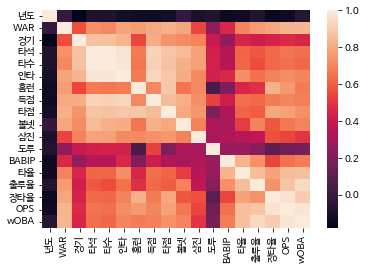

In [ ]:
sns.heatmap(corr)
plt.rc('font', family='NanumBarunGothic') 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


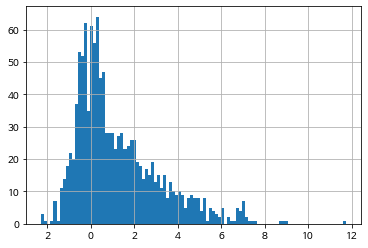

In [ ]:
target=hitter['WAR']
target.hist(bins=100)

In [ ]:
#x는 학습데이터, y는 정답(label) 데이터

y = np.array(np.log1p(hitter['WAR']+2))
X = np.array(hitter)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train_real = pd.DataFrame(X_train).iloc[:,5:]
X_test_real = pd.DataFrame(X_test).iloc[:,5:]
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train_real)
X_test_scaled = minmax_scaler.transform(X_test_real)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7e3f2e5d0>]],
      dtype=object)

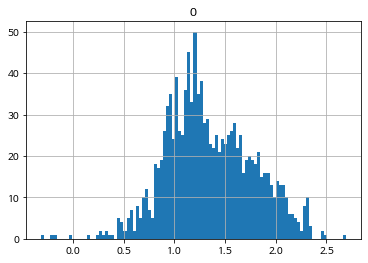

In [ ]:
pd.DataFrame(y).hist(bins=100)

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    #tf.keras.layers.Dense(64, activation='relu'),                                
    #tf.keras.layers.Dropout(0.2), # dropout -> to reduce overfitting problem
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae','mse'])
hist = model.fit(X_train_scaled, y_train, epochs=1000,validation_split=0.2,callbacks=early_stop)
performance = model.evaluate(X_test_scaled, y_test, verbose=2)

Epoch 1/1000
21/21 [==============================] - 2s 10ms/step - loss: 0.7577 - mae: 0.7995 - mse: 0.7577 - val_loss: 0.3298 - val_mae: 0.5199 - val_mse: 0.3298
Epoch 2/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.1487 - mae: 0.3215 - mse: 0.1487 - val_loss: 0.0864 - val_mae: 0.2055 - val_mse: 0.0864
Epoch 3/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0614 - mae: 0.1881 - mse: 0.0614 - val_loss: 0.0814 - val_mae: 0.1942 - val_mse: 0.0814
Epoch 4/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.0577 - mae: 0.1810 - mse: 0.0577 - val_loss: 0.0759 - val_mae: 0.1823 - val_mse: 0.0759
Epoch 5/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0528 - mae: 0.1708 - mse: 0.0528 - val_loss: 0.0732 - val_mae: 0.1738 - val_mse: 0.0732
Epoch 6/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0483 - mae: 0.1627 - mse: 0.0483 - val_loss: 0.0663 - val_mae: 0.1654 - val_mse: 0.0663
Epoch 7/1000
21

In [ ]:
pd.DataFrame(hist.history)

,loss,mae,mse,val_loss,val_mae,val_mse
0,0.563803,0.591818,0.563803,0.050422,0.173120,0.050422
1,0.055734,0.168191,0.055734,0.045137,0.165966,0.045137
2,0.049550,0.157988,0.049550,0.040479,0.161047,0.040479
3,0.048240,0.157454,0.048240,0.036295,0.150679,0.036295
4,0.043252,0.147643,0.043252,0.033339,0.146212,0.033339
5,0.040262,0.143546,0.040262,0.038988,0.157468,0.038988
6,0.037841,0.141883,0.037841,0.032570,0.143076,0.032570
7,0.037304,0.140918,0.037304,0.036165,0.151261,0.036165
8,0.037048,0.140278,0.037048,0.027770,0.131897,0.027770
9,0.036948,0.141986,0.036948,0.030303,0.137811,0.030303


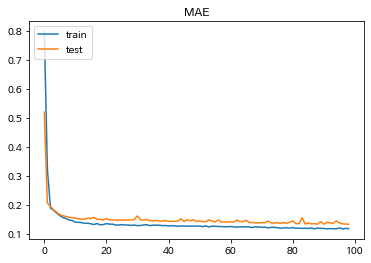

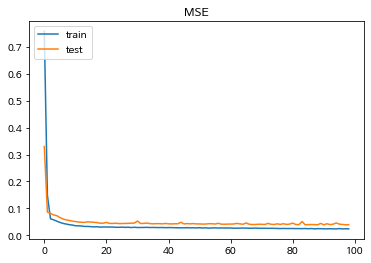

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('MAE')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('MSE')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
hitter_pred = pd.DataFrame({'년도':X_test.iloc[:,0],
              '팀명':X_test.iloc[:,1], 
              '선수명':X_test.iloc[:,2],
              'pred': np.round(list(np.exp(model.predict(X_test_scaled).ravel()) - 1),2),
              'y_test':np.round(np.exp(y_test)-1,2)})
hitter_pred.to_csv('./dnn_hitter_pred',index=False)

##4. Pitcher

In [ ]:
pitcher = pd.read_csv('/content/drive/MyDrive/webdev/Player_Crawling_Pitcher.csv',encoding='CP949')
pitcher = pitcher.drop('Unnamed: 0',axis=1)
pitcher

,년도,팀명,선수명,선수id,WAR,승,패,세,홀드,블론,...,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP
0,2015,LG,소사,/player/detail/115,7.18,10,12,0,1,0,...,194.1,8.20,1.67,0.74,0.327,63.4,4.03,5.57,3.50,3.29
1,2015,Hero,밴헤켄,/player/detail/210,6.35,15,8,0,0,0,...,196.2,8.83,3.07,0.64,0.328,69.6,3.62,6.13,3.60,3.41
2,2015,NC,해커,/player/detail/814,6.10,19,5,0,0,0,...,204.0,7.24,1.59,0.62,0.276,71.5,3.13,8.50,3.78,3.69
3,2015,삼성,윤성환,/player/detail/430,4.97,17,8,0,0,0,...,194.0,7.61,1.39,1.25,0.302,76.0,3.76,6.70,4.35,4.20
4,2015,롯데,린드블럼,/player/detail/1305,4.50,13,11,0,0,0,...,210.0,7.71,2.23,1.20,0.290,78.8,3.56,7.83,4.55,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,2022,SSG,최민준,/player/detail/1614,-0.46,4,1,0,3,2,...,39.1,6.18,5.49,1.60,0.192,82.9,3.89,0.82,6.03,6.13
2079,2022,한화,박윤철,/player/detail/1664,-0.48,0,3,0,0,0,...,26.0,4.15,6.58,1.38,0.308,71.7,4.85,-0.07,6.84,7.25
2080,2022,SSG,김태훈,/player/detail/608,-0.55,0,0,1,2,0,...,5.1,1.69,16.88,3.38,0.235,75.8,10.12,-0.04,13.46,14.26
2081,2022,SSG,박민호,/player/detail/939,-0.56,1,1,0,4,1,...,15.0,4.20,5.40,1.80,0.300,84.7,4.80,-0.07,7.00,7.48


In [ ]:
pitcher = pitcher.astype({'팀명':'string'})
pitcher = pitcher.astype({'선수명':'string'})
pitcher = pitcher.astype({'선수id':'string'})


pitcher = pitcher.replace('-',float(0))

pitcher = pitcher.astype({'삼진/9':'float'})
pitcher = pitcher.astype({'볼넷/9':'float'})
pitcher = pitcher.astype({'홈런/9':'float'})

pitcher = pitcher.astype({'LOB%':'float'})
pitcher = pitcher.astype({'BABIP':'float'})
pitcher = pitcher.astype({'ERA':'float'})
pitcher = pitcher.astype({'FIP':'float'})
pitcher = pitcher.astype({'kFIP':'float'})

In [ ]:
pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   년도       2083 non-null   int64  
 1   팀명       2083 non-null   string 
 2   선수명      2083 non-null   string 
 3   선수id     2083 non-null   string 
 4   WAR      2083 non-null   float64
 5   승        2083 non-null   int64  
 6   패        2083 non-null   int64  
 7   세        2083 non-null   int64  
 8   홀드       2083 non-null   int64  
 9   블론       2083 non-null   int64  
 10  경기       2083 non-null   int64  
 11  선발       2083 non-null   int64  
 12  이닝       2083 non-null   float64
 13  삼진/9     2083 non-null   float64
 14  볼넷/9     2083 non-null   float64
 15  홈런/9     2083 non-null   float64
 16  BABIP    2083 non-null   float64
 17  LOB%     2083 non-null   float64
 18  ERA      2083 non-null   float64
 19  RA9-WAR  2083 non-null   float64
 20  FIP      2083 non-null   float64
 21  kFIP     2083 

In [ ]:
low_game = []
for i in range(len(pitcher)):
  if pitcher['경기'][i] < 50:
    low_game.append(i)
pitcher = pitcher.drop(low_game, axis = 0)
pitcher

,년도,팀명,선수명,선수id,WAR,승,패,세,홀드,블론,...,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP
19,2015,SK,정우람,/player/detail/606,2.59,7,5,16,11,5,...,70.0,11.57,3.60,0.39,0.304,72.9,3.21,3.30,2.63,2.17
22,2015,KIA,윤석민,/player/detail/98,2.52,2,6,30,0,8,...,70.0,8.74,3.09,0.51,0.339,80.5,2.96,3.34,3.23,3.00
29,2015,삼성,임창용,/player/detail/960,2.13,5,2,33,0,5,...,54.0,11.83,2.17,0.33,0.339,75.6,2.83,2.16,2.24,1.71
31,2015,삼성,안지만,/player/detail/428,2.04,4,3,0,37,4,...,78.1,11.03,2.99,0.92,0.366,80.8,3.33,3.13,3.49,3.08
39,2015,NC,임창민,/player/detail/803,1.63,1,5,31,0,4,...,64.0,10.12,2.95,0.98,0.318,73.7,3.80,1.97,3.72,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2021,SSG,김태훈,/player/detail/608,0.02,2,4,1,16,5,...,58.0,7.60,5.90,1.09,0.296,73.0,4.97,0.99,5.54,5.69
1696,2021,한화,정우람,/player/detail/606,0.01,1,4,15,1,6,...,44.2,6.45,4.03,1.01,0.316,66.2,5.64,0.38,4.90,4.99
1732,2021,한화,윤호솔,/player/detail/387,-0.04,3,0,0,8,0,...,48.2,7.77,5.55,1.29,0.262,70.1,4.62,0.68,5.45,5.51
1780,2021,NC,임정호,/player/detail/383,-0.14,0,4,0,12,0,...,34.2,6.23,6.49,0.52,0.324,72.3,4.15,0.58,4.95,5.18


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
corr = pitcher.corr()
print(corr)

               년도       WAR         승         패         세        홀드        블론  \
년도       1.000000 -0.128824 -0.157339 -0.183245  0.020432  0.102472  0.066666   
WAR     -0.128824  1.000000  0.174943  0.071587  0.460013 -0.090733  0.229217   
승       -0.157339  0.174943  1.000000  0.162432  0.010221  0.031235  0.102836   
패       -0.183245  0.071587  0.162432  1.000000  0.124249  0.060022  0.360303   
세        0.020432  0.460013  0.010221  0.124249  1.000000 -0.537674  0.536369   
홀드       0.102472 -0.090733  0.031235  0.060022 -0.537674  1.000000 -0.132535   
블론       0.066666  0.229217  0.102836  0.360303  0.536369 -0.132535  1.000000   
경기      -0.156029  0.161389  0.230972  0.161905 -0.057449  0.411286  0.006638   
선발      -0.238621 -0.014511  0.210964  0.163275 -0.131806 -0.109050 -0.168330   
이닝      -0.323183  0.256783  0.524297  0.430413  0.048727  0.034062  0.110768   
삼진/9    -0.160249  0.551016  0.091237  0.152080  0.223584  0.054938  0.182453   
볼넷/9     0.069470 -0.355409 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


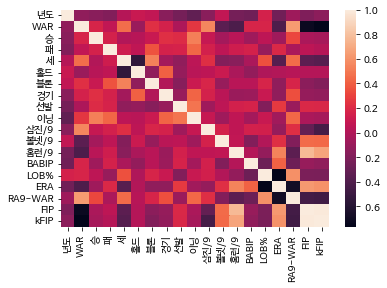

In [ ]:
sns.heatmap(corr)
plt.rc('font', family='NanumBarunGothic') 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


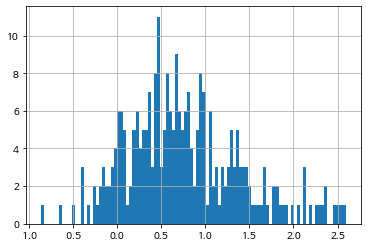

In [ ]:
target=pitcher['WAR']
target.hist(bins=100)

In [ ]:
#x는 학습데이터, y는 정답(label) 데이터

y = np.array(np.log1p(pitcher['WAR']+1))
X = np.array(pitcher)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train_real = pd.DataFrame(X_train).iloc[:,5:]
X_test_real = pd.DataFrame(X_test).iloc[:,5:]
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train_real)
X_test_scaled = minmax_scaler.transform(X_test_real)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7dd90c0d0>]],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


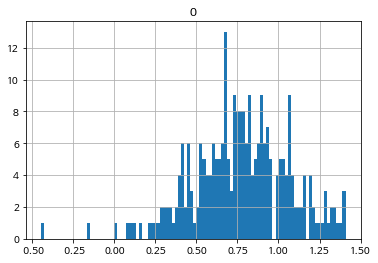

In [ ]:
pd.DataFrame(y).hist(bins=100)

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    #tf.keras.layers.Dense(64, activation='relu'),                                
    #tf.keras.layers.Dropout(0.2), # dropout -> to reduce overfitting problem
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae','mse'])
hist = model.fit(X_train_scaled, y_train, epochs=1000,validation_split=0.2,callbacks=early_stop)
performance = model.evaluate(X_test_scaled, y_test, verbose=2)

Epoch 1/1000
5/5 [==============================] - 2s 75ms/step - loss: 0.9537 - mae: 0.9501 - mse: 0.9537 - val_loss: 0.9545 - val_mae: 0.9533 - val_mse: 0.9545
Epoch 2/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.8662 - mae: 0.9052 - mse: 0.8662 - val_loss: 0.8820 - val_mae: 0.9158 - val_mse: 0.8820
Epoch 3/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.8038 - mae: 0.8703 - mse: 0.8038 - val_loss: 0.8133 - val_mae: 0.8784 - val_mse: 0.8133
Epoch 4/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.7425 - mae: 0.8353 - mse: 0.7425 - val_loss: 0.7500 - val_mae: 0.8421 - val_mse: 0.7500
Epoch 5/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.6848 - mae: 0.8003 - mse: 0.6848 - val_loss: 0.6911 - val_mae: 0.8064 - val_mse: 0.6911
Epoch 6/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.6302 - mae: 0.7661 - mse: 0.6302 - val_loss: 0.6338 - val_mae: 0.7701 - val_mse: 0.6338
Epoch 7/1000
5/5 [====

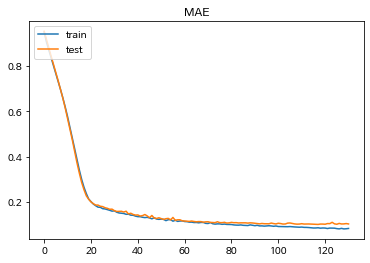

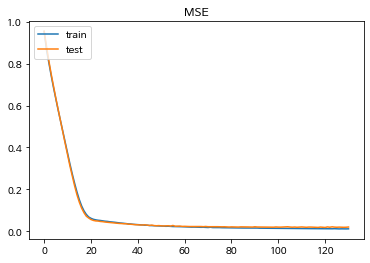

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('MAE')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('MSE')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
pitcher_pred = pd.DataFrame({'년도':X_test.iloc[:,0],
              '팀명':X_test.iloc[:,1], 
              '선수명':X_test.iloc[:,2],
              'pred': np.round(list(np.exp(model.predict(X_test_scaled).ravel()) - 1),2),
              'y_test':np.round(np.exp(y_test)-1,2)})
pitcher_pred.to_csv('./dnn_pitcher_pred',index=False)

##5. Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/webdev/finaldata.csv',encoding='CP949')
data = data.drop('Unnamed: 0',axis=1)
data

,날짜,away team,home team,"승패([0,1])",away 투수,home 투수,away team 명단,home team 명단
0,2015.03.28,한화 이글스,넥센 히어로즈,"[0, 1]",탈보트,밴헤켄,"['이용규', '권용관', '김경언', '김태균', '김회성', '모건', '정범모...","['서건창', '이택근', '유한준', '박병호', '김민성', '스나이더', '이..."
1,2015.03.28,NC 다이노스,두산 베어스,"[0, 1]",찰리,마야,"['박민우', '이종욱', '나성범', '테임즈', '모창민', '이호준', '손시...","['민병헌', '정수빈', '김현수', '루츠', '홍성흔', '오재원', '양의지..."
2,2015.03.28,KT 위즈,롯데 자이언츠,"[0, 1]",어윈,레일리,"['김동명', '이대형', '박경수', '마르테', '김상현', '신명철', '김사...","['아두치', '황재균', '손아섭', '최준석', '박종윤', '강민호', '김대..."
3,2015.03.28,SK 와이번스,삼성 라이온즈,"[0, 1]",밴와트,피가로,"['이명기', '박계현', '이재원', '박정권', '브라운', '임훈', '나주환...","['나바로', '박한이', '박석민', '최형우', '이승엽', '구자욱', '박해..."
4,2015.03.28,LG 트윈스,KIA 타이거즈,"[0, 1]",소사,양현종,"['오지환', '정성훈', '박용택', '최승준', '정의윤', '이병규', '채은...","['김주찬', '강한울', '필', '나지완', '최희섭', '이범호', '김원섭'..."
...,...,...,...,...,...,...,...,...
5449,2022.07.10,NC 다이노스,키움 히어로즈,"[0, 1]",구창모,안우진,"['손아섭', '권희동', '박민우', '양의지', '마티니', '박준영', '이명...","['김준완', '김혜성', '이정후', '송성문', '푸이그', '이용규', '이주..."
5450,2022.07.10,LG 트윈스,두산 베어스,"[1, 0]",켈리,이영하,"['박해민', '문성주', '김현수', '채은성', '문보경', '유강남', '이영...","['허경민', '양찬열', '페르난데', '양석환', '안재석', '박세혁', '박..."
5451,2022.07.10,SSG 랜더스,삼성 라이온즈,"[1, 0]",오원석,백정현,"['추신수', '최지훈', '박성한', '최정', '전의산', '하재훈', '오태곤...","['김현준', '오선진', '피렐라', '오재일', '이원석', '강민호', '이재..."
5452,2022.07.10,롯데 자이언츠,KT 위즈,"[1, 0]",박세웅,배제성,"['안치홍', '황성빈', '한동희', '전준우', '정훈', '피터스', '고승민...","['조용호', '김민혁', '알포드', '박병호', '장성우', '황재균', '배정..."


In [ ]:
for i in range(len(data)):
  if data['승패([0,1])'][i] == '[0, 1]':
    data['승패([0,1])'][i] = 1
  elif data['승패([0,1])'][i] == '[1, 0]':
    data['승패([0,1])'][i] = 0 
data

,날짜,away team,home team,"승패([0,1])",away 투수,home 투수,away team 명단,home team 명단
0,2015.03.28,한화 이글스,넥센 히어로즈,1,탈보트,밴헤켄,"['이용규', '권용관', '김경언', '김태균', '김회성', '모건', '정범모...","['서건창', '이택근', '유한준', '박병호', '김민성', '스나이더', '이..."
1,2015.03.28,NC 다이노스,두산 베어스,1,찰리,마야,"['박민우', '이종욱', '나성범', '테임즈', '모창민', '이호준', '손시...","['민병헌', '정수빈', '김현수', '루츠', '홍성흔', '오재원', '양의지..."
2,2015.03.28,KT 위즈,롯데 자이언츠,1,어윈,레일리,"['김동명', '이대형', '박경수', '마르테', '김상현', '신명철', '김사...","['아두치', '황재균', '손아섭', '최준석', '박종윤', '강민호', '김대..."
3,2015.03.28,SK 와이번스,삼성 라이온즈,1,밴와트,피가로,"['이명기', '박계현', '이재원', '박정권', '브라운', '임훈', '나주환...","['나바로', '박한이', '박석민', '최형우', '이승엽', '구자욱', '박해..."
4,2015.03.28,LG 트윈스,KIA 타이거즈,1,소사,양현종,"['오지환', '정성훈', '박용택', '최승준', '정의윤', '이병규', '채은...","['김주찬', '강한울', '필', '나지완', '최희섭', '이범호', '김원섭'..."
...,...,...,...,...,...,...,...,...
5449,2022.07.10,NC 다이노스,키움 히어로즈,1,구창모,안우진,"['손아섭', '권희동', '박민우', '양의지', '마티니', '박준영', '이명...","['김준완', '김혜성', '이정후', '송성문', '푸이그', '이용규', '이주..."
5450,2022.07.10,LG 트윈스,두산 베어스,0,켈리,이영하,"['박해민', '문성주', '김현수', '채은성', '문보경', '유강남', '이영...","['허경민', '양찬열', '페르난데', '양석환', '안재석', '박세혁', '박..."
5451,2022.07.10,SSG 랜더스,삼성 라이온즈,0,오원석,백정현,"['추신수', '최지훈', '박성한', '최정', '전의산', '하재훈', '오태곤...","['김현준', '오선진', '피렐라', '오재일', '이원석', '강민호', '이재..."
5452,2022.07.10,롯데 자이언츠,KT 위즈,0,박세웅,배제성,"['안치홍', '황성빈', '한동희', '전준우', '정훈', '피터스', '고승민...","['조용호', '김민혁', '알포드', '박병호', '장성우', '황재균', '배정..."
